In [ ]:
import os

import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# MovieLens 100K를 데이터셋을 불러옵니다.
df_ratings = pd.read_csv('dataset/ratings_100k.csv')
df_ratings['date'] = df_ratings.pop('timestamp').pipe(lambda x: pd.to_datetime(x, unit='s'))
df_user = pd.read_csv('dataset/users_100k.csv', index_col='user id')
df_movie = pd.read_csv('dataset/movies_100k.csv', index_col='movie id')

display(df_ratings.head())
display(df_user.head())
display(df_movie.head())

# 머신 러닝(기계 학습, Machine Learning)

**개요**

현재 거대 추천 시스템의 기반이 되는 Matrix Factorization 과 딥러닝 기술을 보기에 앞서, 이 알고리즘의 배경이 되는 머신 러닝을 살펴 봅니다.

이 기술들의 기반이 되는 모수적 모델을 중심으로 대규모 모수적 모델을 학습하기 위한 도구인 Tensorflow의 역활과 사용법에 대하여 알아 봅니다.

**정의**

연산 장치(Computer)로 명시적인 알고리즘(특정 목적을 맞춘 컴퓨터 프로그래밍) 없이 데이터를 통해 성능을 향상시키는 방법을 연구하는 분야

**fit(train)** → **predict(test) / transform(test)**

# 머신러닝 모델(Machine Learning  Model)

- 데이터에서 추출한 지식(패턴)을 연산 장치(컴퓨터)에 근사화한 객체

$y = X + 5 + N(0, 1)$ 

y는 X와의 기울기가 1 이고 절편이 5 인 직선의 관계가 있고 표준 정규 분포를 따르는 노이지가 있습니다. 

이에 해당하는 데이터를 100개 생성해봅니다.

In [ ]:
a, b= 1, 5
X = np.random.random(size=100) * 10
y = X * a + b + np.random.normal(size=100) # 표준 정규 분포를 따르는 노이즈를 더하여 기울기가 a 이고 절편이 b 인 관계를 지니는 데이터 포인트를 만듭니다.
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

**모델**: 데이터가 지닌 특징을 수학적 계산이 가능한 일정한 구조로 표현한 것

위의 자료에서 y와 X의 관계는 직선의 함수로 아래와 같이 표현할 수 있습니다.

$y = X + 5$ 

여기서의 모델은 직선의 함수가 됩니다.

In [ ]:
a, b = 1, 5
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.plot((0, 10), (a * 0 + b, a * 10 + b))
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

## 손실(Loss)

**근사화**에 의해 발생한 실제 데이터와의 오차를 정량화


In [ ]:
# 도식화를 10개만 뽑아 냈습니다.

idx_10 = np.random.choice(np.arange(100), 10)
X, y = X[idx_10], y[idx_10]
plt.figure(figsize=(5, 4))
plt.plot((0, 10), (a * 0 + b, a * 10 + b))
plt.scatter(X, y, s=30, label='actual')
plt.scatter(X, X * a + b, color='orange', label='predicted')
plt.vlines(X, y, X * a + b, linestyles='dashed', color='red', label='error')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(
    {'X': X, 'y': y}
).assign(
    y_hat = lambda x: X * a + b
).assign(
    error = lambda x: x['y'] - x['y_hat'], # 오차
).assign(
    absolute_error = lambda x: x['error'].abs(), # 절대 오차
    squared_error = lambda x: x['error'] ** 2 # 제곱 오차
)

클수록 실제데이터와 차이가 많이 남을 뜻합니다

**error**, **absolute_error**, **squared_error** 에서 Loss로 사용할 수 있는 것은?

> absolute_error
>
> squared_error


### 학습 (Train)

데이터의 **손실**을 최소화 시키도록 모델을 찾는 과정입니다.

### 손실의 종류

#### 회귀 (Regression)

- 정답이 수치형

- 손실: Mean Squared Error

  > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$

Ex) 사용자의 아이템에 대한 평점을 예측

#### 분류 (Classfication)

- 정답이 범주

- 손실: Cross Entropy 

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  이진분류일 경우 다음과 같이 축약할 수 있습니다.

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

Ex) 사용자가 아이템을 좋아요/싫어요 피드백을 예측

#### 군집화

 > $\text{Sum of Squared Errors(SSE)} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

### 성능 지표(Performance Metric)

- 머신러닝 모델을 평가하는 기준

- Metric과 Loss는 같을 수도 있고, 다를 수도 있습니다. 
  
  Metric과 Loss가 다른 과제는 Loss를 낮추는 것이 Metric을 낮추는 것을 보장하지 않기 때문에 이 갭을 메꾸기 위한 방법이 필요합니다.

#### 회귀

  - Mean Squared Error(MSE)
  
    > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
    
  - Mean Absolute Error(MAE)
  
    > $MAE = \frac{1}{n}\sum_{i=1}^{n}|\left(y_i - \hat{y}_i)\right|$
    
  - R2 Score
  
    > $R^2 = 1 - \frac{MSE}{VAR(y)}$
  
#### 분류

  - 정확도(Accuracy)
    
    > $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
  
  - 정밀도(Precision)
  
    > $Precision = \frac{TP}{TP + FP}$
  
  - 재현율(Recall)
    
    > $Recall = \frac{TP}{TP + FN}$


## 모수적 모델(Parametric Model)

> 모집단의 지식(패턴)을 **고정된 함수 구조**로 나타내는 모델

- Ex) 선형 모델, 신경망 모델, Matrix Factorization

- 학습: 학습 데이터를 통해 함수의 모수를 추정하는 것

  ⇒  학습 데이터에 대한 모델의 손실을 최소화하는 모수를 찾는 것

### 선형 회귀 모델(Linear Regression)

대상 변수를 선형 함수로 나타낸 모델

$\hat{y_i} = \hat{\beta}_1x_{i1} + \hat{\beta}_2x_{i2} + ... + \hat{\beta}_nx_{in} + \hat{\beta}_0$

≡ $\hat{y} = X \hat{\beta} + \hat{\beta}_0$

**학습 알고리즘**

  1.정규방정식(OLS, Ordinary Least Square)
  
  정규방정식의 해 아래와 같이 닫힌 형태로 구할 수 있습니다.
  
  $\hat{\beta} = (X^T X)^{-1} X^T y$
  
  2.경사하강법(Gradient Descent)
  
  - 손실(Loss)에 대한 모수의 기울기(Gradient)를 측정하여 손실(Loss)을 낮추는 방향으로 모수를 찾아가는 방법
  
  $Loss = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
  
  $\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

#### **예제: 선형회귀 모델의 학습**

In [ ]:
from sklearn.datasets import make_regression

# 예제로 사용할 데이터셋을 만듭니다.
X, y = make_regression(
    n_samples=100, 
    n_features=1,  # 입력 변수는 한 개로 합니다,
    n_informative=1, 
    noise=4.0,
    bias=1.0, 
    random_state=123
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 변수와 대상 변수를 산포도 그래프로 출력합니다.
sns.scatterplot(x = X[:, 0], y = y)
plt.show()

**Task** 

위 데이터는 입력 데이터는 한 개, 출력 데이터는 한 개인 선형 관계를 지닌 데이터 입니다.

이 데이터가 절편이 있는 선형 회귀 모델을 따른다는 것을 아래와 같이 가정합니다.

$ y = \beta_1 x + \beta_0$

모수적 모델의 학습 함수의 계수들을 구하는 것입니다.

손실 함수가 Mean Squared Error 일 때, 위 데이터를 학습해봅니다.

**1. 정규방정식 (Ordinary Least Square, OLS)**

2차 방정식의 근의 공식이 있듯이, 선형 회귀 모델의 계수를 구하는 것은 공식화 되었습니다. 

이 공식을 바로 정규방정식이라고 합니다.

$\hat{\beta} = (X^T X)^{-1} X^T y$

In [ ]:
# Linear Regression의 상수항(beta_hat_0)을 행렬연산에 포함시켜 구하기 위해 모두 1인 입력변수를 추가합니다.
X_1 = np.hstack([X, np.ones((X.shape[0], 1))])
# 처음 5행만 출력합니다.
X_1[:5]

In [ ]:
np.dot(X_1.T, y)

In [ ]:
# OLS를 통한 Linear Regression 모델 학습
X_gram = #TODO-with  # X_1^T, X_1 행렬곱을 합니다.
X_gram_inv = #TODO-with # X_gram의 역행렬을 구합니다.
beta_hat = #TODO-with # beta_hat을 구합니다.
beta_hat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def linear_reg(X_1, beta_hat):
    """
    학습을 통해 도출한 beta_hat으로 y값 예측합니다.
    """
    return np.dot(X_1, beta_hat)

def plot_linear_model(x_min, x_max, beta_hat, **kwarg):
    """
    beta_hat의 회귀선을 출력합니다.
    """
    x_range = np.array([
        [x_min, 1], 
        [x_max, 1]
    ])
    sns.lineplot(x=x_range[:, 0], y=linear_reg(x_range, beta_hat), **kwarg)
    
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

**2. 경사하강법(Gradient Descent)**

근의 공식은 2차 방정식에

정규 방정식은 선형회귀 모델에만 사용할 수 있는 학습 방법입니다.

선형 회귀 모델을 뿐만 아니라 모수와 손실간의 경사도를 계산할 수 있는 모수적 모델에 적용 가능한,

간단히 말해 보다 다양한 모수적 모델에 적용이 가능한 경사하강법을 소개합니다.


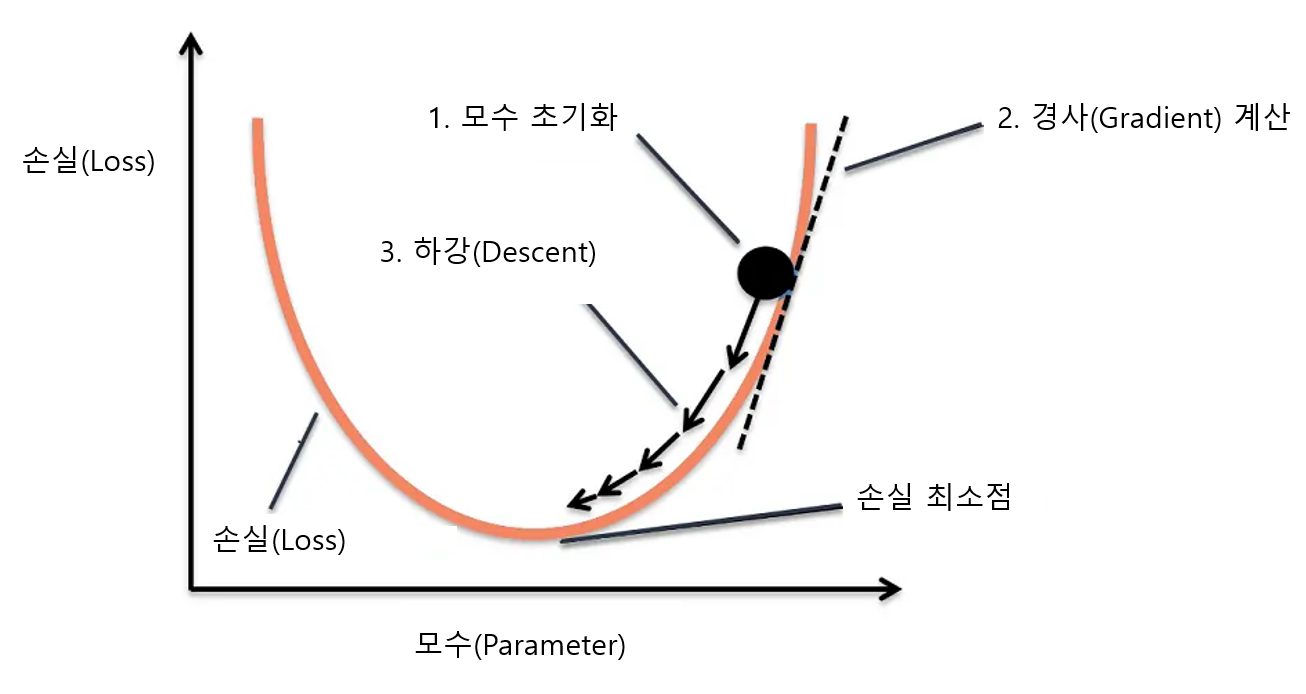


**Step.1** 

모수 초기화

In [ ]:
# 초기화: (-1, 1) 사이의 임의의 2개의 실수를 만듭니다.
beta_hat = np.random.uniform(-1, 1, 2)
beta_hat

**Step 2**

$\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

손실에 대한 회귀 계수의 미분을 이용한 경사(기울기)를 계산하여 손실이 줄어드는 방향으로

계수를 업데이트하여 선형 회귀 모델의 계수 (선형 회귀 계수)를 구해봅니다.

In [ ]:
# 먼저 y_hat: 예측값을 구해봅니다.
y_hat = #TODO-with
y_hat

In [ ]:
#TODO-with

$\sum_{i=1}^{n}{a_i b_i} = a \cdot b$ 임을 이용하여 연산을 줄여 봅니다.

In [ ]:
#TODO-with

$\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

In [ ]:
beta_hat_grad = np.dot(y - y_hat, X_1) / y.shape[0] * -2
beta_hat_grad

In [ ]:
beta_hat = np.random.uniform(-1, 1, 2) #  -1, 1 사이의 임의 수 2개를 생성합니다.
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='yellow')

learning_rate = 0.02 # 학습율(속도)
# Epoch마다 손실(loss)을 기록하기 위한 리스트
losses = []
for epoch in range(100):
    y_hat = #TODO # 현재 회귀 계수의 X_1에 대한 예측 값을 구합니다.
    beta_hat_grad = #TODO # 회귀 계수들의 경사도를 구합니다.

    # Step 3 하강
    beta_hat -= beta_hat_grad * learning_rate # 회귀 계수를 업데이트 합니다.
    
    # 10 epoch 마다 회귀선을 출력합니다.
    if (epoch + 1) % 10 == 0:
        plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='orange')

    loss = np.mean((y_hat - y) ** 2)# Loss Function: Mean Squared Error를 계산합니다.
    
    losses.append(loss)
# 최종 학습된 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

In [ ]:
beta_hat

In [ ]:
# 경사하강법의 반복횟수(Epoch)에 따른 손실을 출력합니다.
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
reg_sgd = SGDRegressor().fit(X, y)
reg_sgd.coef_, reg_sgd.intercept_

**Tensorflow**

**Tensor란?**

n차원 배열 (n이 0이면 단일수, n이 1이면 Vector, n이 2이면 Matrix, n이 3이면 Cube, ...

머신러닝 관점에서 Tensorflow를 한 마디로, 모수적 모델을 구현하기 위한 라이브러리입니다.

Matrix Factorization, 딥러닝은 모수적 모델입니다. 

이 후 파트에서는 Tensorflow를 통한 모델링 학습이 주를 이룹니다.

이를 위해 Tensorflow에 익숙해져 보기 위해 예를 들어 봅니다.

모수(Parameter)라는 단어는 통계 분야에서 주로 사용한 단어입니다. 

Machine Learning에서는 모수(Parameter)보다는 **가중치(Weight)** 를 주로 사용합니다.

Tensorflow에서는 가중치(Weight)라는 단어를 사용합니다. 여기서 부터는 모수(Parameter)를 가중치(Weight)로

사용하도록 하겠습니다.

In [ ]:
# TF_CPP_MIN_LOG_LEVEL: Tensorflow에서 출력할 로그의 수준을 지정합니다. 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

# 불필요한 경고 메세지가 너무 많이 나와서 내용 파악에 어려움이 있어
# Tensorflow에서 출력하는 경고 메세지를 보이지 않게 조정합니다.
# 개발 단계에서는 비활성화 시키지 않는 것을 권장드립니다. 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

In [ ]:
# 장치의 GPU 현황을 조사합니다.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

**단일 변수 회귀 모델을 밀도층으로 모델링**

딥러닝 툴인 Tensorflow로 단일 회귀 모델을 나타내는 가장 간단한 방법은

딥러닝의 밀도 레이어를 사용하면 됩니다.

입력의 수가 1개이고 출력의 수가 한 개인 단일 밀도층으로 구성된 모델이 바로

밀도층으로 구현한 선형 회귀 모델입니다.

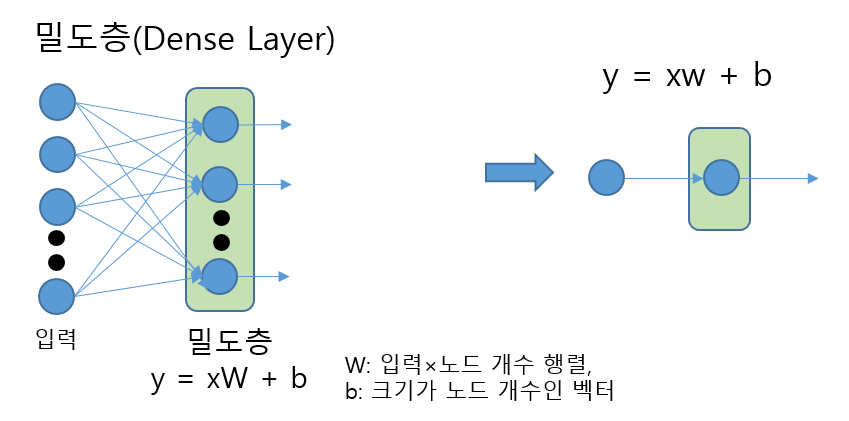

In [ ]:
# Tensorflow로 선형회귀 모델(Linear Regression Model)을 정의합니다.
class LRModel(tf.keras.Model):
    def  __init__(self):
        super().__init__()
        # 출력이 한 개인 밀도 레이어 단층의 신경망
        # Dense Layer에는 입력변수 × 출력변수 형태의 가중치 행렬(Weight Matrix)와 절편(Intercept)이 있습니다.
        # 출력 변수가 1개인 Dense Layer를 생성합니다.
        self.beta_hat = #TODO-with

    def call(self, X):
        y_hat = #TODO-with # X를 beta_hat Layer에 통과 시켜 예측값을 구합니다.
        return y_hat

# Tensorflow 세션 초기화
tf.keras.backend.clear_session()
# 모델 생성합니다. 
lr_model = LRModel()

In [ ]:
# 모델의 구동을 확인해봅니다.
#TODO-with

In [ ]:
# Dense Layer의 가중치 곧 선형 회귀 모델 관점에서 모수를 확안해 봅니다.
#TODO-with

In [ ]:
# Dense Layer의 Weight는  입력 텐서[-1] x 출력 텐서[-1]의 weight와 출력 텐서[-1]의 절편으로 구성 돼있습니다.
lr_model.beta_hat.get_weights()[0] * X[:5] + lr_model.beta_hat.get_weights()[1]

In [ ]:
lr_model.summary()

**Keras**

Deep Learning Framework - Deep Learning을 위한 요소들을 틀로써 정의

**학습 방법 1: Train Loop를 통한 학습**

In [ ]:
# 손실함수를 생성합니다. Mean Squared Error(MSE)
mse = tf.keras.losses.MeanSquaredError()
# 옵티마이저(손실함수를 낮추는 가중치(Weight)를 찾아주는 모듈)을 생성합니다.: Adaptive Gradient Descent 최적화기
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 2.0) # 학습율을 2.0로 설정합니다.
@tf.function
def train_step(X, y):
    # 모델에서 예측값을 구하고, 예측값과 실제값의 손실을 구하는 과정을 tape 객체에 담습니다. 이를 통해 경사도가 계산됩니다.
    with tf.GradientTape() as tape:
        y_hat = lr_model(X)
        loss = #TODO-with
    # 모델에서 학습 가능한 가중치를 가져옵니다.
    variables = #TODO-with
    # 가중치에 대한 경사도를 구합니다.
    gradients = #TODO-with
    # 구한 기울기를 가지고 가중치를 업데이트합니다
    #TODO-with
    return loss

**Auto Diff.** :머신 러닝 관점에서 Tensorflow의 핵심 기능 모델의 계수(가중치, Weight)들의 손실에 대한 경사도를 구해줍니다.

**Tensorflow의 모델 구동 방식**

- Eager Execution - 즉각적으로 실행

- Graph Execution - Graph로 단계들을 구성하여 최적화하여 실행

@tf.function - 지정한 함수안에 연산들을 Graph Execution 방법으로 구동 시키도록합니다.

**Batch** - 데이터를 지정한 숫자 만큼을 나누어 전달토록 합니다.

> 전체 데이터에서 Batch 단위로 나누어 Gradient를 구합니다.
>
> 안정적인 학습을 할 수 있는 충분한 수의 Batch를 연산 장치가 수용할 수 있다면,
> 
> 저장 장치가 허용하는 만큼의 데이터를 학습시킬 수 있습니다.

- 모델의 복잡도가 클수록 많은 큰 사이즈의 Batch가 필요

- 데이터의 복접도가 클수록 많은 큰 사이즈의 Batch가 필요

In [ ]:
# Tensorflow 용 Dataset으로 만들어 줍니다. # batch - 64개
ds = tf.data.Dataset.from_tensor_slices((X, y)).batch(64)
losses = []
for epoch in range(100):
    losses_epoch = []
    for X_, y_ in ds:
        losses_epoch.append(
            train_step(X_, y_) # train_step을 수행하고 손실함수를 기록합니다.
        )
    losses.append(np.mean(losses_epoch))

In [ ]:
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

In [ ]:
# Dense Layer의 가중치 곧 선형 회귀 모델 관점에서 모수를 확안해 봅니다.
lr_model.beta_hat.get_weights() # 33.88429722 / 0.97382454

**학습 방법 2: fit 메소드를 통한 학습**

compile ~ fit 루틴

compile: 모델 학습에 필요한 설정을 합니다.

fit: 데이터셋에 대한 학습 작업을 수행시킵니다.

In [ ]:
# lr_model을 학습하기 위한 설정을 합니다.
lr_model = LRModel()

lr_model.compile(
    # 경사하강 알고리즘을 셋팅합니다: Adaptive Gradient Descent, learing_rate = 2.0
    optimizer = tf.keras.optimizers.Adagrad(learning_rate = 2.0), 
    loss= tf.keras.losses.MeanSquaredError(), # 손실함수를 설정합니다. MeanSquredError, MSE
    metrics=[tf.keras.metrics.MeanSquaredError(name = 'mse')] # mse: Mean Squared Error 모델 성능 측정지표를 성정합니다.
)

# epochs: 최적화 루팅 반복 회수, 100회
# verbose: 0 - 중간 결과 출력을 생략합니다.
# 확습을 시킵니다.
hist = lr_model.fit(ds, epochs = 100, verbose = 0)

In [ ]:
sns.lineplot(hist.history['mse'])
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

**Gradient Descent의 의미**

1. **Loss에 대한 모수의 기울기만 구할 있다면**,  모든 모수 모델에 대하여 적용이 가능합니다.

2. **데이터 스트림을 통한 학습**이 가능합니다. 

  > 모델 학습 시 전체 데이터를 메모리에 올리지않고, 학습에 필요한 Batch 단위로 나누어 진행합니다.
  >
  > 대규모의 학습 데이터를 입력으로 사용 가능합니다.


## 모델 검증 

투입할 모델을 선택하기 위한 제작한 머신러닝 모델이 **실제 상황**에서 **성능**을 **측정**하는 과정입니다.

  - 홀드아웃(Hold-out) 검증: 학습(Train)/검증(Validation) 단순 분리

  - 교차 검증 (Cross-Validation)

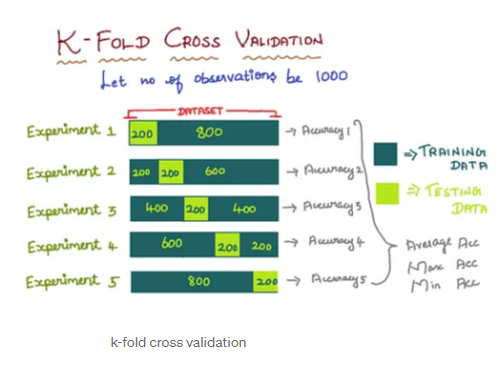

## 기계학습의 궁극 목표

- 실제 투입이 되었을 때 성능이 좋은 머신러닝 모델을 만드는 것 → **일반화(Generalization)**

  > 학습 데이터를 통해 일반화(Generalized)된 머신러닝 모델을 만드는 것
  >
  > 과적합(Over-fit): 학습데이터에 모델이 지나치게 맞추어져 학습데이터에 치우침에 의해 일반성을 잃어 버린 상태입니다.
  >
  > 과소적합(Under-fit): 학습데이터에 모델이 덜 맞추어져 현상을 제대로 모델이 담지 못하여 낮은 일반성을 지닌 상태입니다.
    
  ⇒ 모델이 투입이 되는 상황에 맞춰어 **평가(Test) 체계**를 만들고, 이에 맞추어 모델을 **검증(Validation)**
  
  ⇒ 속성 공학 - 파생 변수 생성, 차원 축소, 스캐일링, ... 
  
  ⇒ 최적합 모델을 도출 - 모델 튜닝, 앙상블, ...

## 규제(Regularization)

머신 러닝 모델의 일반화를 위해 모델의 학습 데이터에 지나치게 치우치는 것을 제어하기 위한 방법

### 모수적 모델의 규제

- 학습셋에 적합시키는 정도를 제한하기 위한 방법

모수의 크기(Magnitude)의 합을 규제 계수와 곱하고 손실 함수에 더합니다.

모수의 크기(Magnitude)가 커질 수록 손실이 커지게 되므로,

모수의 크기(Magnitude)가 커지는 것이 억제됩니다.

규제 계수의 크기에 따라 규제의 강도를 조절할 수 있습니다.

> L1-norm: 모수의 절대값의 합을 손실 함수에 반영
>
> L2-norm: 모수의 제곱의 합을 손실 함수에 반영


- Ridge 모델: Linear Regression에 L2 규제를 적용한 모델

- Lasso 모델: Linear Regression에 L1 규제를 적용한 모델 

- Elastic Net: Linear Regression에 L1/L2 규제를 적용한 모델

In [ ]:
from sklearn.linear_model import Ridge

sns.scatterplot(x = X[:, 0], y = y)
# 규제의 강도(1, 10, 20)에 따른 선형 회귀선을 출력합니다.
for alpha in [1, 10, 20]:
    reg_rd = Ridge(alpha=alpha)
    reg_rd.fit(X, y)
    plot_linear_model(X[:, 0].min(), X[:, 0].max(), np.array([reg_rd.coef_[0], reg_rd.intercept_]), label='alpha: {}'.format(alpha))
    y_hat = reg_rd.predict(X)
    losses.append(np.mean(np.square(y - y_hat)))
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

## 용어 정의

> 대상 변수(Target Variable) - 지도학습에서 정답에 해당하는 변수
>
> 입력 변수(Input Variable) - 기계학습 모델에 입력 변수
>
> 모수 (Parameter) - 모집단이 지니는 특징을 나타내는 수. 모평균 / 모분산 ...
>
> 가중치 (Weight) - 인공신경망에서의 모수(Parameter)
>
> 손실 (Loss) - 모델링을 통해서 발생한 실제 현상에 대한 정보 손실


# 머신러닝 맛보기

## 실습: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자별 영화 평점 예측기를 만들어 봅시다. 

지표: R2

검증법: Holdout 검증, 학습데이터:평가데이터 = 8:2


In [ ]:
from sklearn.model_selection import train_test_split
# 학습:평가 = 8:2로 하여 학습/평가를 셋을 합니다.
df_train, df_test = train_test_split(df_ratings, train_size=0.8, random_state=123)

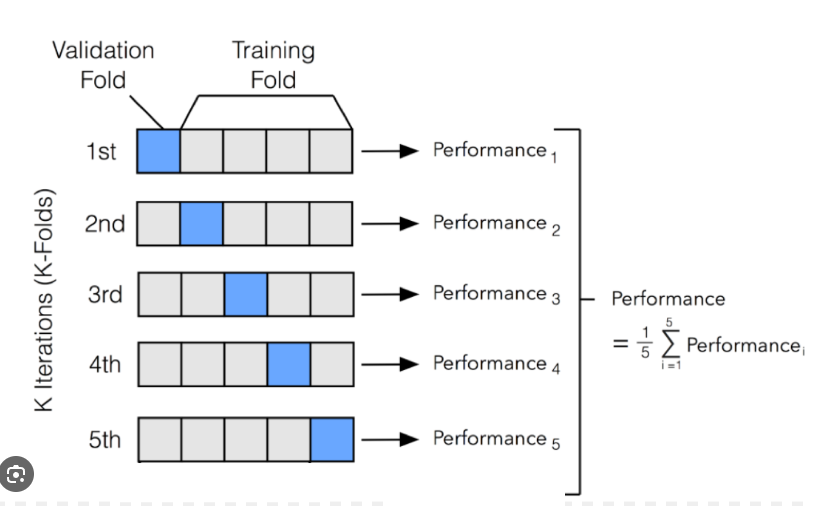

### **선형 회귀**모델을 이용한 초간단 평점 예측 모델

MovieLens 100K에서  80%는 학습, 20%는 평가데이터로 구성합니다. 

입력변수: 사용자의 rating 평균, 영화의 rating 평균

로 하여 rating(평점)을 맞추는 선형회귀 모델을 학습하고 평가해봅니다.

In [ ]:
from sklearn.model_selection import train_test_split
# 학습:평가 = 8:2로 하여 학습/평가를 셋을 합니다.
df_train, df_test = train_test_split(df_ratings, train_size=0.8, random_state=123)

In [ ]:
df_train.shape, df_test.shape

**TargetEncoder**

범주형 변수를 수준별 대상값에 대한 평균으로 인코딩해주는 전처리기 입니다.

In [ ]:
from sklearn.preprocessing import TargetEncoder
tgt = TargetEncoder(target_type = "continuous")
tgt.fit(df_train[['user id', 'item id']], df_train['rating'])

In [ ]:
pd.DataFrame(
    tgt.transform(df_train[['user id', 'item id']]), columns = ['user id', 'item id']
).head(5)

In [ ]:
# TargetEncoder 내부에는 평균을 보정하는 작업에 의한 미세한 차이가 있습니다.
# pandas 를 이용해 구현해봅니다.
#TODO-with

**Pipeline**

단계별 데이터 처리 과정들을 결합하여 하나의 모델로 만듭니다.

Ex) TargetEncoder + LinearRegression

In [ ]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

X_lr = ['user id', 'item id']
# 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
# 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
# 선형 회귀 모델 
reg_lr = #TODO-with
# 학습
#TODO-with
# 예측
#TODO-with

**성능 측정**

측정 지표: R2 Score

$1 - \frac{\text{MSE}}{\text{VAR}}$

In [ ]:
from sklearn.metrics import r2_score

r2_score(
    df_test['rating'], reg_lr.predict(df_test[X_lr])
)

**5-fold cross validation**

예제를 통해 이해해 봅니다.

In [ ]:
# 처음 5개의 셋만 가져옵니다.
df_train_5 = df_train.iloc[:5]
df_train_5

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
cv = KFold(5, random_state=1, shuffle=True)
cnt = 1
scores = list()
reg_lr = make_pipeline(
    TargetEncoder(target_type = 'continuous', cv = 4), LinearRegression()
)
for train_idx, test_idx in cv.split(df_train_5):
    df_cv_train = df_train_5.iloc[train_idx] # 검증 학습셋
    print("검정 학습셋: {}".format(cnt))
    display(df_cv_train)
    reg_lr.fit(df_cv_train[X_lr], df_cv_train['rating'])

    print("검정  테스트셋: {}".format(cnt))
    df_cv_test = df_train_5.iloc[test_idx] # 검증 테스트셋
    prd = reg_lr.predict(df_cv_test[X_lr]) # 예측합니다.
    display(df_cv_test)
    score = mean_squared_error(df_cv_test['rating'], prd) # 지표 측정합니다.
    scores.append(score)
    print('Validation #{}, MSE: {:.5}'.format(cnt, score)) # 검정 라운드별 성능을 출혁합니다.
    cnt += 1
print(scores, np.mean(scores))

**sklearn.model_selection.cross_validate**

상기의 과정을 함수로 구현한 것입니다.

In [ ]:
from sklearn.model_selection import KFold, cross_validate
# 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
# 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
# 선형 회귀 모델 
reg_lr = make_pipeline(
    TargetEncoder(target_type = 'continuous'), LinearRegression()
)
X_lr = ['user id', 'item id']
# 5 fold cross validate를 해봅니다. 지표는 r2_score 사용합니다. #r2, neg_mean_squared_error
result = cross_validate(
    reg_lr, df_train[X_lr], df_train['rating'], scoring = 'r2', cv = cv, return_train_score = True
)
np.mean(result['test_score']), np.mean(result['train_score'])

In [ ]:
# 모델 검증 프로세스부터 구현합니다.
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import r2_score

# 5-fold cross validate splitter를 설정합니다. random_state=123, shuffle=True
cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model(model, df, X):
    # cross_validate를 활용하여 R2 Score를 지표로하고 Splitter는 5-fold cross validate, train_score까지 반환토록하여 model 성능을 측정합니다.
    # scoring = 'r2', 
    return #TODO-with

In [ ]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

X_lr = ['user id', 'item id']
# user id, item id에 대한 Target Encoder 를 설정합니다.. target_type = 'continuous': target이 연속형 변수
# Target Encoder와 Linear Regression을 결합합니다.
reg_lr = #TODO
result = eval_model(reg_lr, df_train, X_lr)
result, np.mean(result['test_score'])

In [ ]:
# 모델 선택 및 평가
from sklearn.metrics import r2_score
# reg_lr을 df_train 전체로 학습 시킵니다. rating에 대해 학습시킵니다.
#TODO
# df_test의 rating을 예측하고, 정답과의 r2_score를 구합니다.
r2_score(
    #TODO
)

### 실습: 사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 rating  예측 모델의 기능을 추가해봅니다.

직업과 성별은 OneHotEncoder를 사용합니다. 

그리고 장르는 장르의 해당 여부를 그대로 전달합니다.

In [ ]:
# gender, occupation을 활용하기 위에 df_user와 결합합니다.
# genre를 활용하기 위해 df_movie와 결합합니다.
df_train_2 = #TODO
df_test_2 = #TODO
df_train_2.head()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**OneHotEncoder**

범주형 변수를 수준에 해당하면 1, 그렇지 않으면 0으로 하여 인코딩할 수준 만큼 가변수를 만들어 냅니다.

Ex) 
|gender|
|----|
|M|
|F|
|...|

→ 가변수화

|gender_M|gender_F|
|---|----|
|1|0|
|0|1|
|...|

In [ ]:
display(df_user.iloc[:5][['gender']])
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(df_user[['gender']])
pd.DataFrame(
    ohe.transform(df_user[['gender']]),
    columns=ohe.get_feature_names_out(['gender'])
)

**ColumnTransformer**

변수별 전처리를 지정할 수 있게합니다. 

|전처리기|변수|
|----|-------|
|TargetEncoder|user id, item id|
|OneHotEncoder|occupation, gender|
|passthrough(통과)|genre 컬럼|

In [ ]:
X_genre = df_movie.columns[2:].tolist()
X_genre

In [ ]:
ct = ColumnTransformer([
    # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    #TODO-with, 
    #TODO-with, # 직업, 성별은 가변수화 합니다. 선형회귀분석을 사용하므로 다중공선성문제를 피하기 위해 수준 하나를 제외하고 가변수화 합니다.
    #TODO-with # Genre 여부는 그대로 모델에 전달합니다.
])
X_lr_2 = ['user id', 'item id'] + ['occupation', 'gender'] + X_genre
# ColumnTransformer의 변환과 출력 결과를 DataFrame으로 정리해봅니다.
ct.fit(df_train_2[X_lr_2], df_train_2['rating'])
pd.DataFrame(
    ct.transform(df_train_2[X_lr_2]), columns = ct.get_feature_names_out()
).head()

In [ ]:
# ColumnTransformer -변수별 인코딩 방법을 달리 구성하여 처리 단계를 만듭니다.
ct = ColumnTransformer([
    # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    #TODO, 
    #TODO, # 직업, 성별은 가변수화 합니다. 선형회귀분석을 사용하므로 다중공선성문제를 피하기 위해 수준 하나를 제외하고 가변수화 합니다.
    #TODO # Genre 여부는 그대로 모델에 전달합니다.
])
# ColumnTransformer와 LinearRegression을 연결합니다.
reg_lr_2 = #TODO
X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
# eval model에 전달하여 검증 결과를 얻어 옵니다.
result = eval_model(reg_lr_2, df_train_2, X_lr_2)
result, np.mean(result['test_score']) # Baseline: 0.2731

In [ ]:
from sklearn.metrics import r2_score
# 평가를 진행합니다.
# reg_lr_2 모델을 df_train_2 전체셋으로 학습합니다.
reg_lr_2.fit(df_train_2[X_lr_2], df_train_2['rating'])
# df_test_2 에 대해서 rating 예측을 하고, R2를 측정합니다.
r2_score(
    df_test_2['rating'], reg_lr_2.predict(df_test_2[X_lr_2])
) # 0.2751

### 로지스틱 회귀 (Logistic Regression Model)

선형 회귀 모델로 로지스틱 함수를 통해 \[0, 1\] 실수 영역 즉 확률의 영역을 예측하도록 한 선형 모델

즉, 분류 문제를 선형회귀 모델로 풀 수 있도록 변경한 모델. 

로짓 함수: [0, 1] 확률 영역의 실수를 [-∞, ∞]로 변환해주는 함수

  > $logit(p)= \log(\frac{p}{1-p})$

로지스틱 함수: [-∞, ∞] 실수를 [0, 1] 확률 영역의 실수로 변환해주는 함수: 로짓함수의 역함수

  > $logistic(x)= \frac{1}{1 + e^{-x}}$

SoftMax  함수: 다중클래스 분류를 위한 링크(link)함수

  > $softmax(x_i) = \frac{e^{x_i}}{\sum_j{e^{x_j}}}$, $x_i$는 i클래스의 로짓
  
손실 함수: Cross Entropy

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$(이진 분류)
  
학습 알고리즘: 경사하강법

In [ ]:
# logistic 함수를 출력해봅니다.

from scipy.special import expit
plt.figure(figsize=(6, 3))
x = np.linspace(-5, 5, 100)
sns.lineplot(x = x, y =  x / 5 + 0.5, label='linear')
sns.lineplot(x = x, y = expit(x), label='logistic')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='black', linestyle='--')
plt.show()

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자가 영화에 평점 여부를 맞추는 모델을 만듭니다.

지표: AUC(Area Under of ROC Curve)

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation

**로지스틱 회귀**분석을 이용한 초간단 모델을 만들어 봅니다.

입력변수: 사용자의 rating을 한 비율, 영화의 rating을 받은 비율

In [ ]:
# 1. user id와 item id를 cross tab을 하여 사용자별 평가 내역이 있으면 1, 없으면 0인 DataFrame을 만듭니다.
# 2. 이를 stack 하여 user id별 item id에 대한 시청 유무를 나타내는 데이터프레임으로 변환합니다.
df_ratings_yn = #TODO-with
df_ratings_yn.head()

In [ ]:
df_ratings_yn.shape, df_ratings_yn['yn'].value_counts()

In [ ]:
# 학습셋 8, 평가셋 2의 비율로 나눕니다.
df_train_yn, df_test_yn = train_test_split(df_ratings_yn, train_size=0.8, random_state=123)

In [ ]:
# 이진 분류에 대한 타겟 인코딩으로 설정합니다.
# Positive인 비율로 인코딩 됩니다.
tgt = TargetEncoder(target_type = 'binary')
tgt.fit(df_train_yn[['user id', 'item id']], df_train_yn['yn'])
tgt.transform(df_train_yn[['user id', 'item id']])

In [ ]:
pd.concat([
    df_train_yn.groupby(i)['yn'].transform('mean').rename(i)
    for i in ['user id', 'item id']
], axis = 1).head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf_lr = make_pipeline(
    TargetEncoder(target_type = 'binary'), LogisticRegression()
)
clf_lr.fit(df_train_yn[['user id', 'item id']], df_train_yn['yn'])
roc_auc_score(
    df_train_yn['yn'], clf_lr.predict_proba(df_train_yn[['user id', 'item id']])[:, 1]
)

In [ ]:
roc_auc_score(
    df_test_yn['yn'], clf_lr.predict_proba(df_test_yn[['user id', 'item id']])[:, 1]
)

**검증 루틴을 만들어 봅니다.**

In [ ]:
# 모델 검증 프로 루틴입니다.
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate
from sklearn.metrics import roc_auc_score

# 5겹 교차 검증을 세팅합니다.
kf = KFold(n_splits=5, random_state=123, shuffle=True)
skf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
def eval_model_yn(model, df, X, cv = skf):
    # roc_auc_score를 지표로하는 평가 루틴을 만듭니다. 
    result = cross_validate(
        model, df[X], df['yn'], scoring = 'roc_auc', cv = cv, return_train_score = True
    )
    return result

**모델 인스턴스를 만듭니다.**

sklearn.linear_model.LogisticRegression을 활용해 봅니다.

In [ ]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

clf_lr = make_pipeline(
    TargetEncoder(target_type = 'binary'), # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    LogisticRegression() # 로지스틱 회귀모델
)
X_lr = ['user id', 'item id']

In [ ]:
# 모델을 평가해봅니다.
result = eval_model_yn(clf_lr, df_train_yn, X_lr, cv = kf)
result, np.mean(result['test_score']), np.std(result['test_score'])

In [ ]:
# 모델을 평가해봅니다.
result = eval_model_yn(clf_lr, df_train_yn, X_lr, cv = skf)
result, np.mean(result['test_score']), np.std(result['test_score'])

In [ ]:
from sklearn.metrics import roc_auc_score
# reg_lr을 df_train_yn 'yn'을 예측하도록 학습시킵니다.
clf_lr.fit(df_train_yn[X_lr], df_train_yn['yn'])
# df_test_yn의 'yn'이 Positive일 확률을 예측하여 AUC를 측정합니다.
roc_auc_score(
    df_test_yn['yn'], clf_lr.predict_proba(df_test_yn[X_lr])[:, 1]
)

**실습**

사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 yn  예측 모델의 기능을 추가해봅니다.

In [ ]:
X_genre = df_movie.columns[2:].tolist()
X_genre

In [ ]:
# gender, occupation을 활용하기 위에 df_user와 결합합니다.
# genre를 활용하기 위해 df_movie와 결합합니다.
df_train_yn_2 = df_train_yn.join(df_user[['occupation', 'gender']], on = 'user id').join(df_movie[X_genre], on = 'item id')
df_test_yn_2 = df_test_yn.join(df_user[['occupation', 'gender']], on = 'user id').join(df_movie[X_genre], on = 'item id')

In [ ]:
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    #TODO, 
    #TODO, # 직업과 성별의 가변수를 첫번째 범주를 제외시켜 추가합니다.
    #TODO,  # 장르 정보는 직접 사용가능하므로 통과 시킵니다.
])

# ct와 Logistic Regression 결합한 모델 reg_lr_2를 만듭니다.
clf_lr_2 = #TODO
X_lr_2 = ['user id', 'item id'] + ['occupation', 'gender'] + X_genre
result = eval_model_yn(clf_lr_2, df_train_yn_2, X_lr_2, cv = skf)
result, np.mean(result['test_score']) # 0.8786

In [ ]:
from sklearn.metrics import roc_auc_score
# df_train_yn_2로 reg_lr_2을 yn을 예측하도록 학습 시킵니다.
clf_lr_2.fit(df_train_yn_2[X_lr_2], df_train_yn_2['yn'])
# df_test_yn_2를 reg_lr_2로 yn이 True일 확률을 맞추도록 학습시킵니다.
roc_auc_score(
    df_test_yn_2['yn'], clf_lr_2.predict_proba(df_test_yn_2[X_lr_2])[:, 1]
) # 0.8789